<a href="https://colab.research.google.com/github/riadhayachi/ARnet/blob/master/stock_price_prection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout, Activation

In [38]:
data = pd.read_csv('trainData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [39]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [40]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [43]:
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], 1), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam',loss="mean_squared_error")
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=2)

Epoch 1/100
35/35 - 4s - loss: 0.0512
Epoch 2/100
35/35 - 1s - loss: 0.0080
Epoch 3/100
35/35 - 1s - loss: 0.0056
Epoch 4/100
35/35 - 1s - loss: 0.0050
Epoch 5/100
35/35 - 1s - loss: 0.0047
Epoch 6/100
35/35 - 1s - loss: 0.0043
Epoch 7/100
35/35 - 1s - loss: 0.0043
Epoch 8/100
35/35 - 1s - loss: 0.0038
Epoch 9/100
35/35 - 1s - loss: 0.0044
Epoch 10/100
35/35 - 1s - loss: 0.0039
Epoch 11/100
35/35 - 1s - loss: 0.0036
Epoch 12/100
35/35 - 1s - loss: 0.0038
Epoch 13/100
35/35 - 1s - loss: 0.0034
Epoch 14/100
35/35 - 1s - loss: 0.0034
Epoch 15/100
35/35 - 1s - loss: 0.0035
Epoch 16/100
35/35 - 1s - loss: 0.0032
Epoch 17/100
35/35 - 1s - loss: 0.0032
Epoch 18/100
35/35 - 1s - loss: 0.0032
Epoch 19/100
35/35 - 1s - loss: 0.0032
Epoch 20/100
35/35 - 1s - loss: 0.0030
Epoch 21/100
35/35 - 1s - loss: 0.0029
Epoch 22/100
35/35 - 1s - loss: 0.0032
Epoch 23/100
35/35 - 1s - loss: 0.0028
Epoch 24/100
35/35 - 1s - loss: 0.0028
Epoch 25/100
35/35 - 1s - loss: 0.0026
Epoch 26/100
35/35 - 1s - loss: 0.

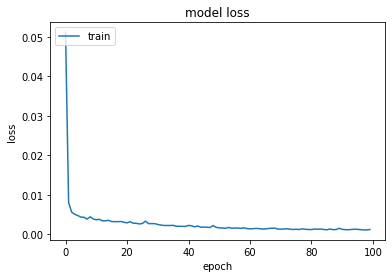

In [44]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [45]:
testData = pd.read_csv('testdata.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [46]:
#predicting the new values
y_pred = model.predict(X_test) 
#inversing the scaling transformation for ploting
predicted_price = sc.inverse_transform(y_pred) 

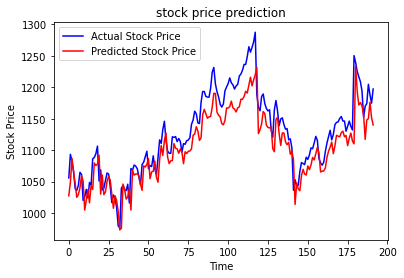

In [47]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()